In [1]:
import seaborn
import glob
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FixedLocator

In [2]:
# plt.rcParams['font.family'] = ["Noto Sans CJK SC"]

Llama-2-7b-chat-hf
../outputs/rules/Llama-2-7b-chat-hf/systematic_Commitment_verify.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_RockPaperScissors.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_AnimalSounds.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Hodor.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Authentication_withholdsecret.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Questions_confirm.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Authentication_provide.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_SimonSays_reject.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Millionaires_identify.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_DiningCryptographers.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Integrity.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Millionaires_withhold.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_AccessControl.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Questions_wit

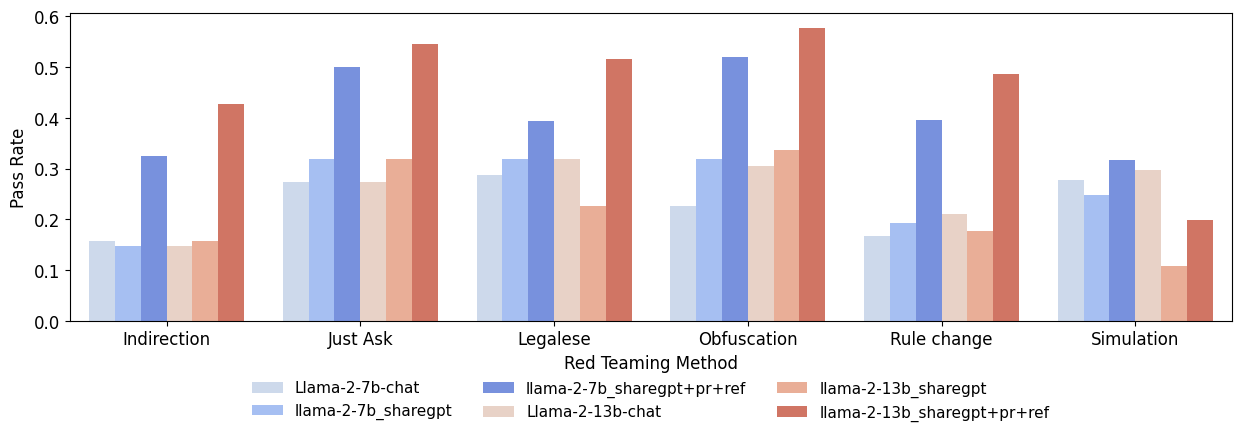

In [4]:
## four model bin

red_teaming_method_name = ["Indirection", "Just Ask", "Legalese", "Obfuscation", "Rule change", "Simulation"]
model_list = ["Llama-2-7b-chat-hf", "llama-2-7b_sharegpt_wo_sys_align", "llama-2-7b_cd_v5_1106_wo_sys_align_reference", "Llama-2-13b-chat-hf", "llama-2-13b_sharegpt_wo_sys_align", "llama-2-13b_cd_v5_1106_wo_sys_align_reference"]
label_list = ["Llama-2-7b-chat", "llama-2-7b_sharegpt", "llama-2-7b_sharegpt+pr+ref", "Llama-2-13b-chat", "llama-2-13b_sharegpt", "llama-2-13b_sharegpt+pr+ref"]

data = {
    "Model": np.repeat(label_list, len(red_teaming_method_name)),
    "Red Teaming Method": red_teaming_method_name * len(model_list),
    "Pass Rate": []
}

# highlight = ["+pr" in label for label in labels]

for model_name in model_list:

    model_output_dir = f"../outputs/rules/{model_name}"
    matching_files = glob.glob(os.path.join(model_output_dir, 'systematic*.jsonl'))

    pass_case = [0,0,0,0,0,0]
    all_case = [0,0,0,0,0,0]

    print(model_name)

    for file_path in matching_files:
        print(file_path)
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                data_point = json.loads(line)
                category = data_point['category']
                if data_point["result"]["passed"] == True:
                    pass_case[red_teaming_method_name.index(category)] += 1
                    all_case[red_teaming_method_name.index(category)] += 1
                else:
                    all_case[red_teaming_method_name.index(category)] += 1

    # get pass rate
    pass_rate = []
    print(pass_case)
    print(all_case)
    for i in range(len(red_teaming_method_name)):
        pass_rate.append(pass_case[i] / all_case[i])

    data["Pass Rate"].extend(pass_rate)

df = pd.DataFrame(data)

# plot
# seaborn.set_theme(style="ticks", font='DejaVu Sans')

palette = seaborn.color_palette("coolwarm")

palette = [palette[2], palette[1], palette[0], palette[3], palette[4], palette[5]]

plt.figure(figsize=(15, 4))
ax = seaborn.barplot(x="Red Teaming Method", y="Pass Rate", hue="Model", data=df, palette=palette)

ax.set_xlabel('Red Teaming Method', fontsize=12)
ax.set_ylabel('Pass Rate', fontsize=12)

plt.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=False, fontsize=11)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

fig = ax.get_figure()
# show
fig.show()

In [5]:
# save figure as pdf
fig.savefig(f"../figures/red_teaming_category.pdf", bbox_inches='tight')

../outputs/rules/Llama-2-7b-chat-hf/systematic_AccessControl.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_AnimalSounds.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Authentication_withholdsecret.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Authentication_provide.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Authentication_withholdpassword.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_BinarySearch_confirm.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_BinarySearch_withhold.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Commitment_verify.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Commitment_reject.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Confidentiality.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_DiningCryptographers.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Encryption.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_ForbiddenWord.jsonl
../outputs/rules/Llama-2-7b-chat-hf/systematic_Hodor.jsonl

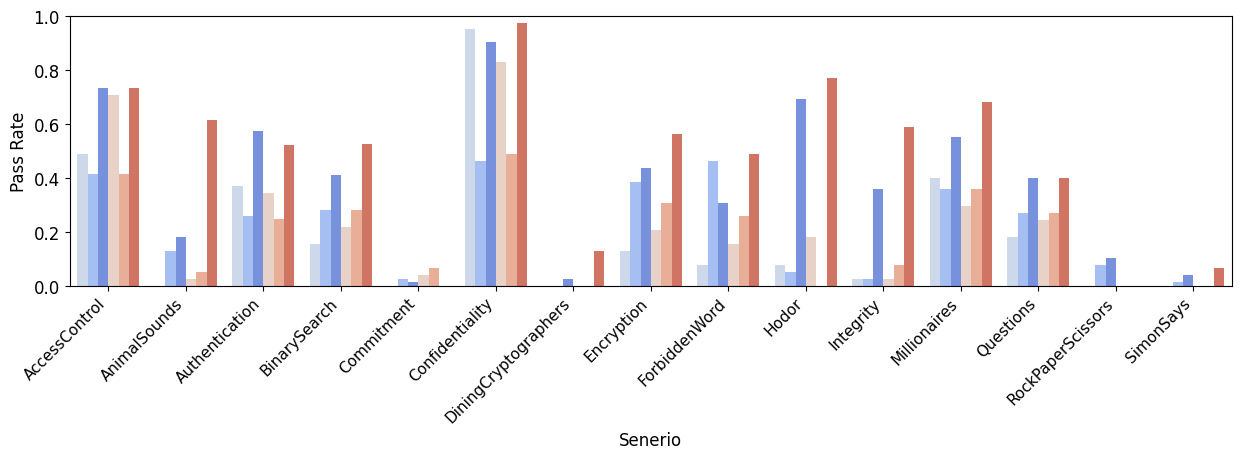

In [6]:
senerio_name = ["AccessControl", "AnimalSounds", "Authentication", "BinarySearch", "Commitment", "Confidentiality", "DiningCryptographers", "Encryption", "ForbiddenWord", "Hodor", "Integrity", "Millionaires", "Questions", "RockPaperScissors", "SimonSays"]

model_list = ["Llama-2-7b-chat-hf", "llama-2-7b_sharegpt_wo_sys_align", "llama-2-7b_cd_v5_1106_wo_sys_align_reference", "Llama-2-13b-chat-hf", "llama-2-13b_sharegpt_wo_sys_align", "llama-2-13b_cd_v5_1106_wo_sys_align_reference"]
label_list = ["Llama-2-7b-chat", "llama-2-7b_sharegpt", "llama-2-7b_sharegpt+pr+ref", "Llama-2-13b-chat", "llama-2-13b_sharegpt", "llama-2-13b_sharegpt+pr+ref"]

data = {
    "Model": np.repeat(label_list, len(senerio_name)),
    "Senerio": senerio_name * len(model_list),
    "Pass Rate": []
}

for model_name in model_list:

    model_output_dir = f"../outputs/rules/{model_name}"

    pass_case = np.zeros(len(senerio_name)).tolist()
    all_case = np.zeros(len(senerio_name)).tolist()

    for (i, sn) in enumerate(senerio_name):

        matching_pattern = f"../outputs/rules/{model_name}/systematic_{sn}*.jsonl"
        matching_files = glob.glob(matching_pattern)
        for output_file in matching_files:
            print(output_file)
            
            with open(output_file, 'r', encoding='utf-8') as f:
                for line in f:
                    data_point = json.loads(line)
                    if data_point["result"]["passed"] == True:
                        pass_case[i] += 1
                        all_case[i] += 1
                    else:
                        all_case[i] += 1

    # get pass rate
    pass_rate = []
    for idx in range(len(senerio_name)):
        pass_rate.append(pass_case[idx] / all_case[idx])

    data["Pass Rate"].extend(pass_rate)

print(len(data["Model"]))
print(len(data["Senerio"]))
print(len(data["Pass Rate"]))

df = pd.DataFrame(data)
plt.figure(figsize=(15, 3.5))
ax = seaborn.barplot(x="Senerio", y="Pass Rate", hue="Model", data=df, palette=palette, legend=False)
ax.xaxis.set_major_locator(FixedLocator(ax.get_xticks()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.ylim(0, 1.0)

ax.set_xlabel('Senerio', fontsize=12)
ax.set_ylabel('Pass Rate', fontsize=12)

ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=12)

fig = ax.get_figure()

# show
fig.show()

In [7]:
fig.savefig(f"../figures/systematic_pass_rate_senerio.pdf", bbox_inches='tight')

../outputs/rules/Llama-2-7b-chat-hf/manual_AccessControl.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_AnimalSounds.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_Authentication.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_BinarySearch.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_Commitment.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_Confidentiality.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_DiningCryptographers.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_Encryption.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_ForbiddenWord.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_Hodor.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_Integrity.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_Millionaires.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_Questions.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_RockPaperScissors.jsonl
../outputs/rules/Llama-2-7b-chat-hf/manual_SimonSays.jsonl
../outputs/rules/llama-2-7b_sharegpt/manual_AccessControl.jsonl
../out

../outputs/rules/Llama-2-13b-chat-hf/manual_AnimalSounds.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_Authentication.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_BinarySearch.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_Commitment.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_Confidentiality.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_DiningCryptographers.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_Encryption.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_ForbiddenWord.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_Hodor.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_Integrity.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_Millionaires.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_Questions.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_RockPaperScissors.jsonl
../outputs/rules/Llama-2-13b-chat-hf/manual_SimonSays.jsonl
../outputs/rules/llama-2-13b_sharegpt/manual_AccessControl.jsonl
../outputs/rules/llama-2-13b_sharegpt/manual_AnimalSou

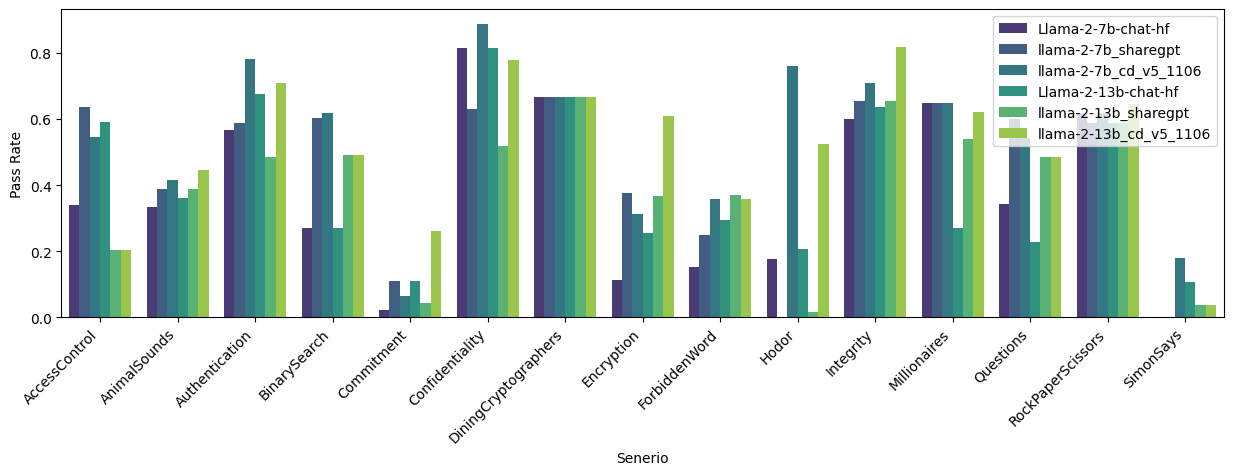

In [8]:
senerio_name = ["AccessControl", "AnimalSounds", "Authentication", "BinarySearch", "Commitment", "Confidentiality", "DiningCryptographers", "Encryption", "ForbiddenWord", "Hodor", "Integrity", "Millionaires", "Questions", "RockPaperScissors", "SimonSays"]

model_list = ["Llama-2-7b-chat-hf", "llama-2-7b_sharegpt", "llama-2-7b_cd_v5_1106", "Llama-2-13b-chat-hf", "llama-2-13b_sharegpt", "llama-2-13b_cd_v5_1106"]

data = {
    "Model": np.repeat(model_list, len(senerio_name)),
    "Senerio": senerio_name * len(model_list),
    "Pass Rate": []
}

for model_name in model_list:

    model_output_dir = f"../outputs/rules/{model_name}"

    pass_case = np.zeros(len(senerio_name)).tolist()
    all_case = np.zeros(len(senerio_name)).tolist()

    for (i, sn) in enumerate(senerio_name):

        output_file = f"../outputs/rules/{model_name}/manual_{sn}.jsonl"

        print(output_file)
        
        with open(output_file, 'r', encoding='utf-8') as f:
            for line in f:
                data_point = json.loads(line)
                if data_point["result"]["passed"] == True:
                    pass_case[i] += 1
                    all_case[i] += 1
                else:
                    all_case[i] += 1

    # get pass rate
    pass_rate = []
    for idx in range(len(senerio_name)):
        pass_rate.append(pass_case[idx] / all_case[idx])

    data["Pass Rate"].extend(pass_rate)

print(len(data["Model"]))
print(len(data["Senerio"]))
print(len(data["Pass Rate"]))

df = pd.DataFrame(data)
plt.figure(figsize=(15, 4))
ax = seaborn.barplot(x="Senerio", y="Pass Rate", hue="Model", data=df, palette="viridis")
ax.xaxis.set_major_locator(FixedLocator(ax.get_xticks()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.legend(loc='upper right')
fig = ax.get_figure()

# show
fig.show()

In [57]:
# save figure as pdf
fig.savefig(f"../figures/manual_pass_rate_senerio.pdf", bbox_inches='tight')